In [1]:
import qiskit_metal as qm

In [2]:
from qiskit_metal import designs, draw, MetalGUI, Dict, open_docs
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.framed_path import RouteFramed
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
import numpy as np
from collections import OrderedDict

In [3]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

In [4]:
design.chips.main.size.size_x='5 mm'
design.chips.main.size.size_y='5 mm'

In [5]:
def guidraw(n=1, dlt=False, hlt=False):
    if dlt:
        gui.rebuild()
        gui.screenshot()
    else:
        gui.rebuild()
        gui.autoscale()
        if n==1:
            gui.edit_component(['Q1'])
        gui.zoom_on_components([f'Q{i}' for i in range(1, n+1)])
        if hlt:
            gui.highlight_components([f'Q{i}' for i in range(1, n+1)])
        gui.screenshot()

In [6]:
def clean():
    design.delete_all_components()

In [7]:
def Three_Qubiteers_Star():
    design.overwrite_enabled = True
    
    options = Dict(
        pad_width = '450 um',
        pocket_height = '650um',
        connection_pads= Dict(
            #a = Dict(loc_W= +1, loc_H= +1),
            b = Dict(loc_W= -1, loc_H= +1, pad_height='40um'),
            #c = Dict(loc_W= +1, loc_H= -1, pad_width='200um'),
            d = Dict(loc_W= -1, loc_H= -1, pad_height='50um'),
        )
    )
    
    q1 = TransmonPocket(design, 'Q1', options=Dict(pos_x='+0.00mm', pos_y='+2.598mm', orientation=90, **options))
    q2 = TransmonPocket(design, 'Q2', options=Dict(pos_x='+1.50mm', pos_y='+0.00mm', orientation = -30, **options))
    q3 = TransmonPocket(design, 'Q3', options=Dict(pos_x='-1.50mm', pos_y='+0.00mm', orientation = -150,  **options))
    
    guidraw(n=3, hlt=True)

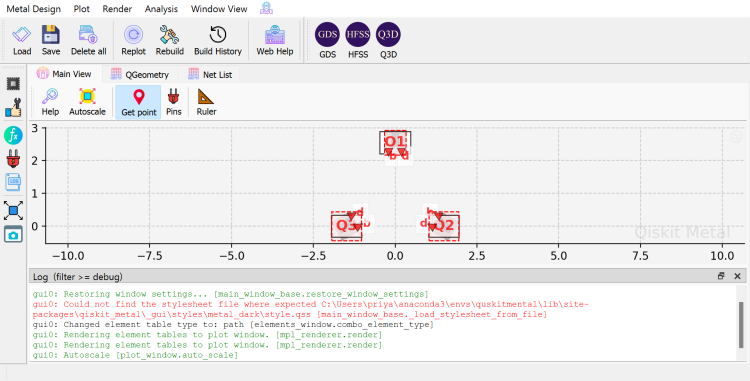

In [8]:
Three_Qubiteers_Star()

In [9]:
RoutePathfinder.get_template_options(design)

{'chip': 'main',
 'layer': '1',
 'pin_inputs': {'start_pin': {'component': '', 'pin': ''},
  'end_pin': {'component': '', 'pin': ''}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'trace_width': 'cpw_width',
 'anchors': {},
 'advanced': {'avoid_collision': 'true'},
 'step_size': '0.25mm',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False}

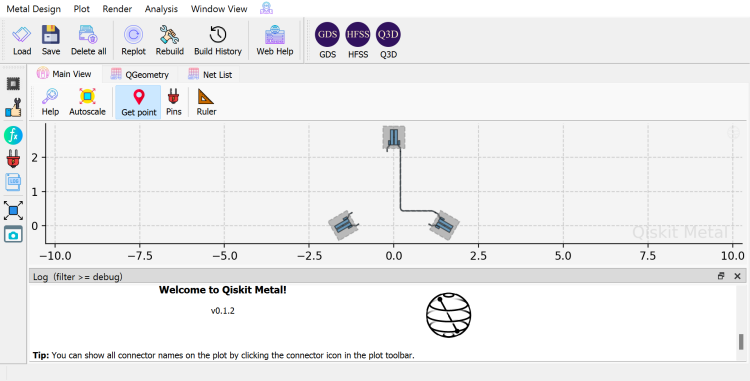

In [10]:
ops = Dict(fillet = '90um')

options = Dict(
    total_length = '9mm',
    pin_inputs = Dict(
        start_pin = Dict(
            component = 'Q1',
            pin = 'd'
        ),
        end_pin = Dict(
            component = 'Q2',
            pin = 'b'
        )
    ),
    lead = Dict(
        start_straight = '0.1mm',
        end_straight = '0.1mm'
    ),
    meander = Dict(
        spacing = '200um',
        asymmetry = '0.0um'
    ),
    **ops
)

try:
    cpw12.delete()
except NameError: pass

cpw12  = RoutePathfinder(design, options=options)

guidraw(n=3)

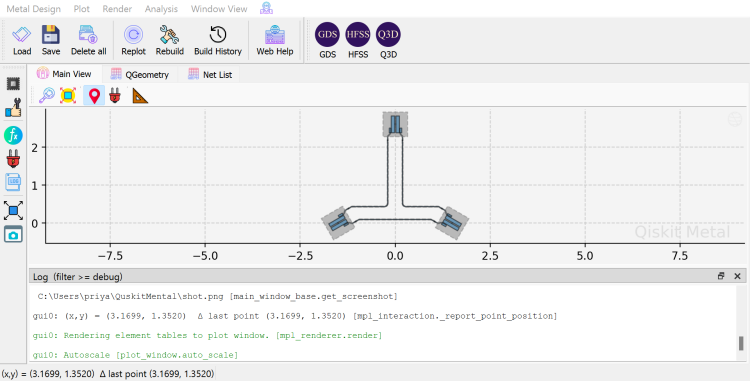

In [15]:
options = Dict(
    total_length = '9mm',
    pin_inputs = Dict(
        start_pin = Dict(
            component = 'Q2',
            pin = 'd'
        ),
        end_pin = Dict(
            component = 'Q3',
            pin = 'b'
        )
    ),
    lead = Dict(
        start_straight = '0.1mm',
        end_straight = '0.1mm'
    ),
    meander = Dict(
        spacing = '200um',
        asymmetry = '-0.5um'
    ),
    layer = '1',
    **ops
)

try:
    cpw23.delete()
except NameError: pass

cpw23  = RoutePathfinder(design, options=options)

guidraw(n=3)

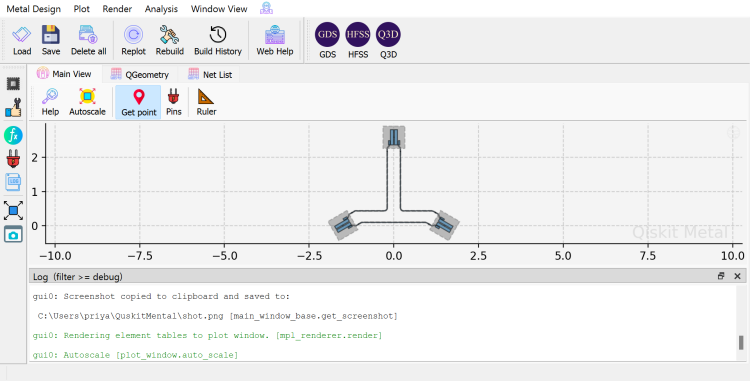

In [12]:
anchors = OrderedDict()
bw_anchors = OrderedDict()

#anchors[0] = np.array([0.2, 2])
#anchors[1] = np.array([0.2, 0.5])
#bw_anchors[0] = "M"
#bw_anchors[1] = "PF"
#bw_anchors[2] = ""

options = Dict(
    total_length = '9mm',
    pin_inputs = Dict(
        start_pin = Dict(
            component = 'Q1',
            pin = 'b'
        ),
        end_pin = Dict(
            component = 'Q3',
            pin = 'd'
        )
    ),
    lead = Dict(
        start_straight = '0.1mm',
        end_straight = '0.1mm'
    ),
    anchors = anchors,
    between_anchors = bw_anchors,
    meander = Dict(
        spacing = '200um',
        asymmetry = '0.0um'
    ),
    **ops
)

try:
    cpw31.delete()
except NameError: pass

cpw31  = RoutePathfinder(design, options=options)

guidraw(n=3)

In [13]:

def connections(total_length:str, com1:str, pin1:str, com2: str, pin2: str, st_st:str, end_st: str, spacing:str, asym):
    
    ops = Dict(fillet = '99.99um')
    
    myopts= Dict(
        total_length = total_length,
        hfss_wire_bonds = True,
        pin_inputs = Dict(
            start_pin = Dict(
                component = com1,
                pin = pin1
            ),
            end_pin = Dict(
                component = com2,
                pin = pin2
            )
        ),
        lead = Dict(
            start_straight = st_st,
            end_straight = end_st
        ),
        meander = Dict(
            spacing = spacing,
            asymmetry = asym
        ),
        **ops
    )

    try: 
        cpw.delete()
    except NameError: pass

    cpw = RouteMeander(design, options=myopts)

In [14]:
'''try:
    cpw12.delete()
    cpw23.delete()
    cpw31.delete()
except NameError: pass
length= '6mm'
cpw12 = connect(length, 'Q1', '', )

SyntaxError: incomplete input (3463893216.py, line 1)